# Did Exercise in China during DLI
cant find code - so found similar on google search on github

Here as exercise:
https://github.com/carlb15/Dinosaur_Island_Character_Lvl_Language_Model

Here with solution:
https://github.com/rvarun7777/Deep_Learning/blob/master/Sequence%20Models/Week%201/Dinosaur%20Island%20--%20Character-level%20language%20model/Dinosaurus%20Island%20--%20Character%20level%20language%20model%20final%20-%20v3.ipynb

# Character level language model - Dinosaurus land

Welcome to Dinosaurus Island! 65 million years ago, dinosaurs existed, and in this assignment they are back. You are in charge of a special task. Leading biology researchers are creating new breeds of dinosaurs and bringing them to life on earth, and your job is to give names to these dinosaurs. If a dinosaur does not like its name, it might go beserk, so choose wisely! 

<table>
<td>
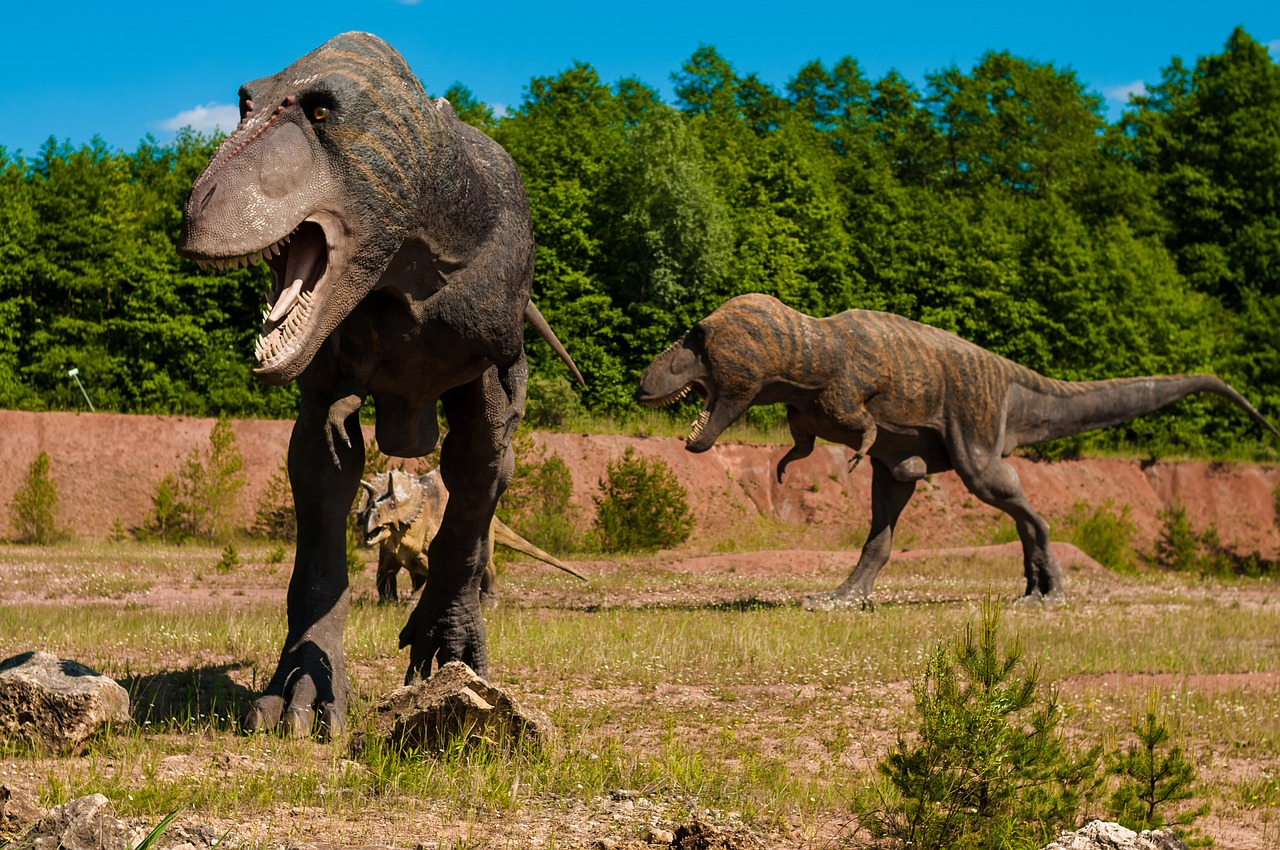

</td>

</table>

Luckily you have learned some deep learning and you will use it to save the day. Your assistant has collected a list of all the dinosaur names they could find, and compiled them into this [dataset](https://raw.githubusercontent.com/carlb15/Dinosaur_Island_Character_Lvl_Language_Model/master/dinos.txt) . (Feel free to take a look by clicking the previous link.) To create new dinosaur names, you will build a character level language model to generate new names. Your algorithm will learn the different name patterns, and randomly generate new names. Hopefully this algorithm will keep you and your team safe from the dinosaurs' wrath! 

By completing this assignment you will learn:

- How to store text data for processing using an RNN 
- How to synthesize data, by sampling predictions at each time step and passing it to the next RNN-cell unit
- How to build a character-level text generation recurrent neural network
- Why clipping the gradients is important

We will begin by loading in some functions that we have provided for you in `rnn_utils`. Specifically, you have access to functions such as `rnn_forward` and `rnn_backward` which are equivalent to those you've implemented in the previous assignment. 

In [ ]:
import numpy as np
from utils import *
import random
from random import shuffle

## 1 - Problem Statement

### 1.1 - Dataset and Preprocessing

Run the following cell to read the dataset of dinosaur names, create a list of unique characters (such as a-z), and compute the dataset and vocabulary size. 

In [ ]:
data = open('dinos.txt', 'r').read()
data= data.lower()
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print('There are %d total characters and %d unique characters in your data.' % (data_size, vocab_size))

The characters are a-z (26 characters) plus the "\n" (or newline character), which in this assignment plays a role similar to the `<EOS>` (or "End of sentence") token we had discussed in lecture, only here it indicates the end of the dinosaur name rather than the end of a sentence. In the cell below, we create a python dictionary (i.e., a hash table) to map each character to an index from 0-26. We also create a second python dictionary that maps each index back to the corresponding character character. This will help you figure out what index corresponds to what character in the probability distribution output of the softmax layer. Below, `char_to_ix` and `ix_to_char` are the python dictionaries. 

In [ ]:
char_to_ix = { ch:i for i,ch in enumerate(sorted(chars)) }
ix_to_char = { i:ch for i,ch in enumerate(sorted(chars)) }
print(ix_to_char)

### 1.2 - Overview of the model

Your model will have the following structure: 

- Initialize parameters 
- Run the optimization loop
    - Forward propagation to compute the loss function
    - Backward propagation to compute the gradients with respect to the loss function
    - Clip the gradients to avoid exploding gradients
    - Using the gradients, update your parameter with the gradient descent update rule.
- Return the learned parameters 
    
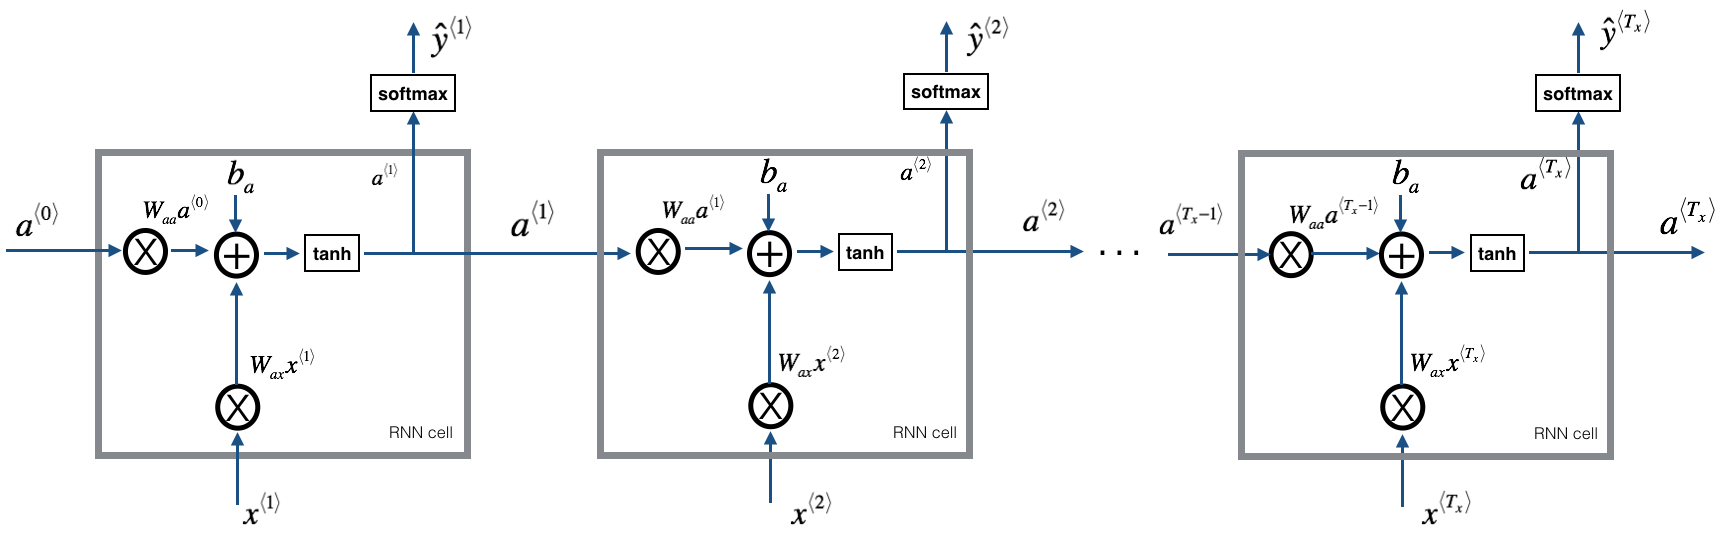

<caption><center> **Figure 1**: Recurrent Neural Network, similar to what you had built in the previous notebook "Building a RNN - Step by Step".  </center></caption>

At each time-step, the RNN tries to predict what is the next character given the previous characters. The dataset $X = (x^{\langle 1 \rangle}, x^{\langle 2 \rangle}, ..., x^{\langle T_x \rangle})$ is a list of characters in the training set, while $Y = (y^{\langle 1 \rangle}, y^{\langle 2 \rangle}, ..., y^{\langle T_x \rangle})$ is such that at every time-step $t$, we have $y^{\langle t \rangle} = x^{\langle t+1 \rangle}$. 

## 2 - Building blocks of the model

In this part, you will build two important blocks of the overall model:
- Gradient clipping: to avoid exploding gradients
- Sampling: a technique used to generate characters

You will then apply these two functions to build the model.

### 2.1 - Clipping the gradients in the optimization loop

In this section you will implement the `clip` function that you will call inside of your optimization loop. Recall that your overall loop structure usually consists of a forward pass, a cost computation, a backward pass, and a parameter update. Before updating the parameters, you will perform gradient clipping when needed to make sure that your gradients are not "exploding," meaning taking on overly large values. 

In the exercise below, you will implement a function `clip` that takes in a dictionary of gradients and returns a clipped version of gradients if needed. There are different ways to clip gradients; we will use a simple element-wise clipping procedure, in which every element of the gradient vector is clipped to lie between some range [-N, N]. More generally, you will provide a `maxValue` (say 10). In this example, if any component of the gradient vector is greater than 10, it would be set to 10; and if any component of the gradient vector is less than -10, it would be set to -10. If it is between -10 and 10, it is left alone. 

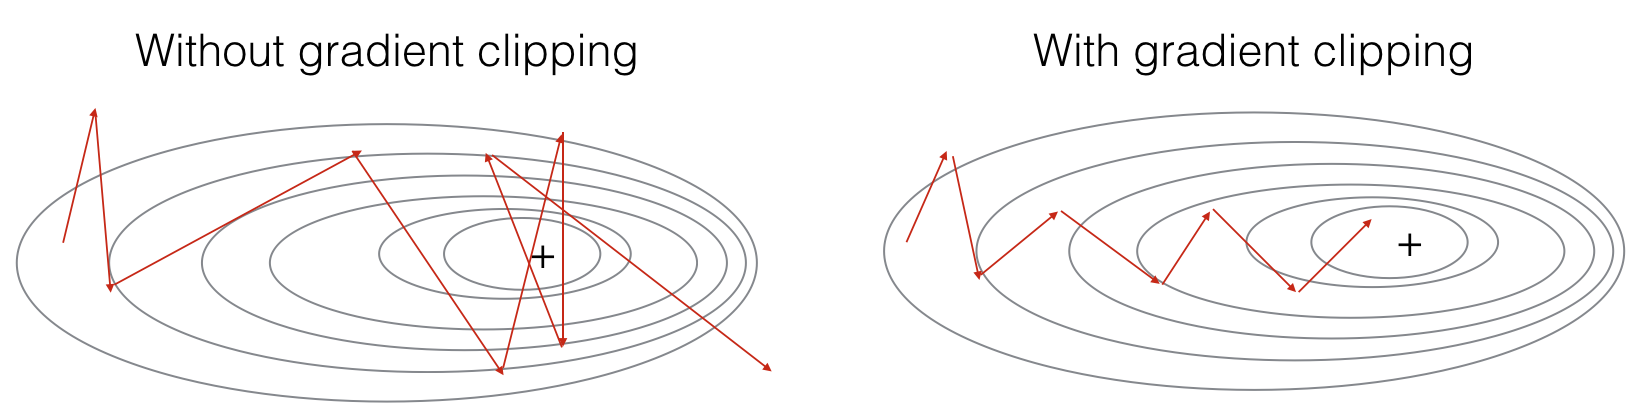

<caption><center> **Figure 2**: Visualization of gradient descent with and without gradient clipping, in a case where the network is running into slight "exploding gradient" problems. </center></caption>

**Exercise**: Implement the function below to return the clipped gradients of your dictionary `gradients`. Your function takes in a maximum threshold and returns the clipped versions of your gradients. You can check out this [hint](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.clip.html) for examples of how to clip in numpy. You will need to use the argument `out = ...`.

In [ ]:
### GRADED FUNCTION: clip

def clip(gradients, maxValue):
    '''
    Clips the gradients' values between minimum and maximum.
    
    Arguments:
    gradients -- a dictionary containing the gradients "dWaa", "dWax", "dWya", "db", "dby"
    maxValue -- everything above this number is set to this number, and everything less than -maxValue is set to -maxValue
    
    Returns: 
    gradients -- a dictionary with the clipped gradients.
    '''
    
    dWaa, dWax, dWya, db, dby = gradients['dWaa'], gradients['dWax'], gradients['dWya'], gradients['db'], gradients['dby']
   
    ### START CODE HERE ###
    # clip to mitigate exploding gradients, loop over [dWax, dWaa, dWya, db, dby]. (≈2 lines)
    for gradient in [dWax, dWaa, dWya, db, dby]:
        None
    ### END CODE HERE ###
    
    gradients = {"dWaa": dWaa, "dWax": dWax, "dWya": dWya, "db": db, "dby": dby}
    
    return gradients

In [ ]:
np.random.seed(3)
dWax = np.random.randn(5,3)*10
dWaa = np.random.randn(5,5)*10
dWya = np.random.randn(2,5)*10
db = np.random.randn(5,1)*10
dby = np.random.randn(2,1)*10
gradients = {"dWax": dWax, "dWaa": dWaa, "dWya": dWya, "db": db, "dby": dby}
gradients = clip(gradients, 10)
print("gradients[\"dWaa\"][1][2] =", gradients["dWaa"][1][2])
print("gradients[\"dWax\"][3][1] =", gradients["dWax"][3][1])
print("gradients[\"dWya\"][1][2] =", gradients["dWya"][1][2])
print("gradients[\"db\"][4] =", gradients["db"][4])
print("gradients[\"dby\"][1] =", gradients["dby"][1])

** Expected output:**

<table>
<tr>
    <td> 
    **gradients["dWaa"][1][2] **
    </td>
    <td> 
    10.0
    </td>
</tr>

<tr>
    <td> 
    **gradients["dWax"][3][1]**
    </td>
    <td> 
    -10.0
    </td>
    </td>
</tr>
<tr>
    <td> 
    **gradients["dWya"][1][2]**
    </td>
    <td> 
0.29713815361
    </td>
</tr>
<tr>
    <td> 
    **gradients["db"][4]**
    </td>
    <td> 
[ 10.]
    </td>
</tr>
<tr>
    <td> 
    **gradients["dby"][1]**
    </td>
    <td> 
[ 8.45833407]
    </td>
</tr>

</table>

### 2.2 - Sampling

Now assume that your model is trained. You would like to generate new text (characters). The process of generation is explained in the picture below:

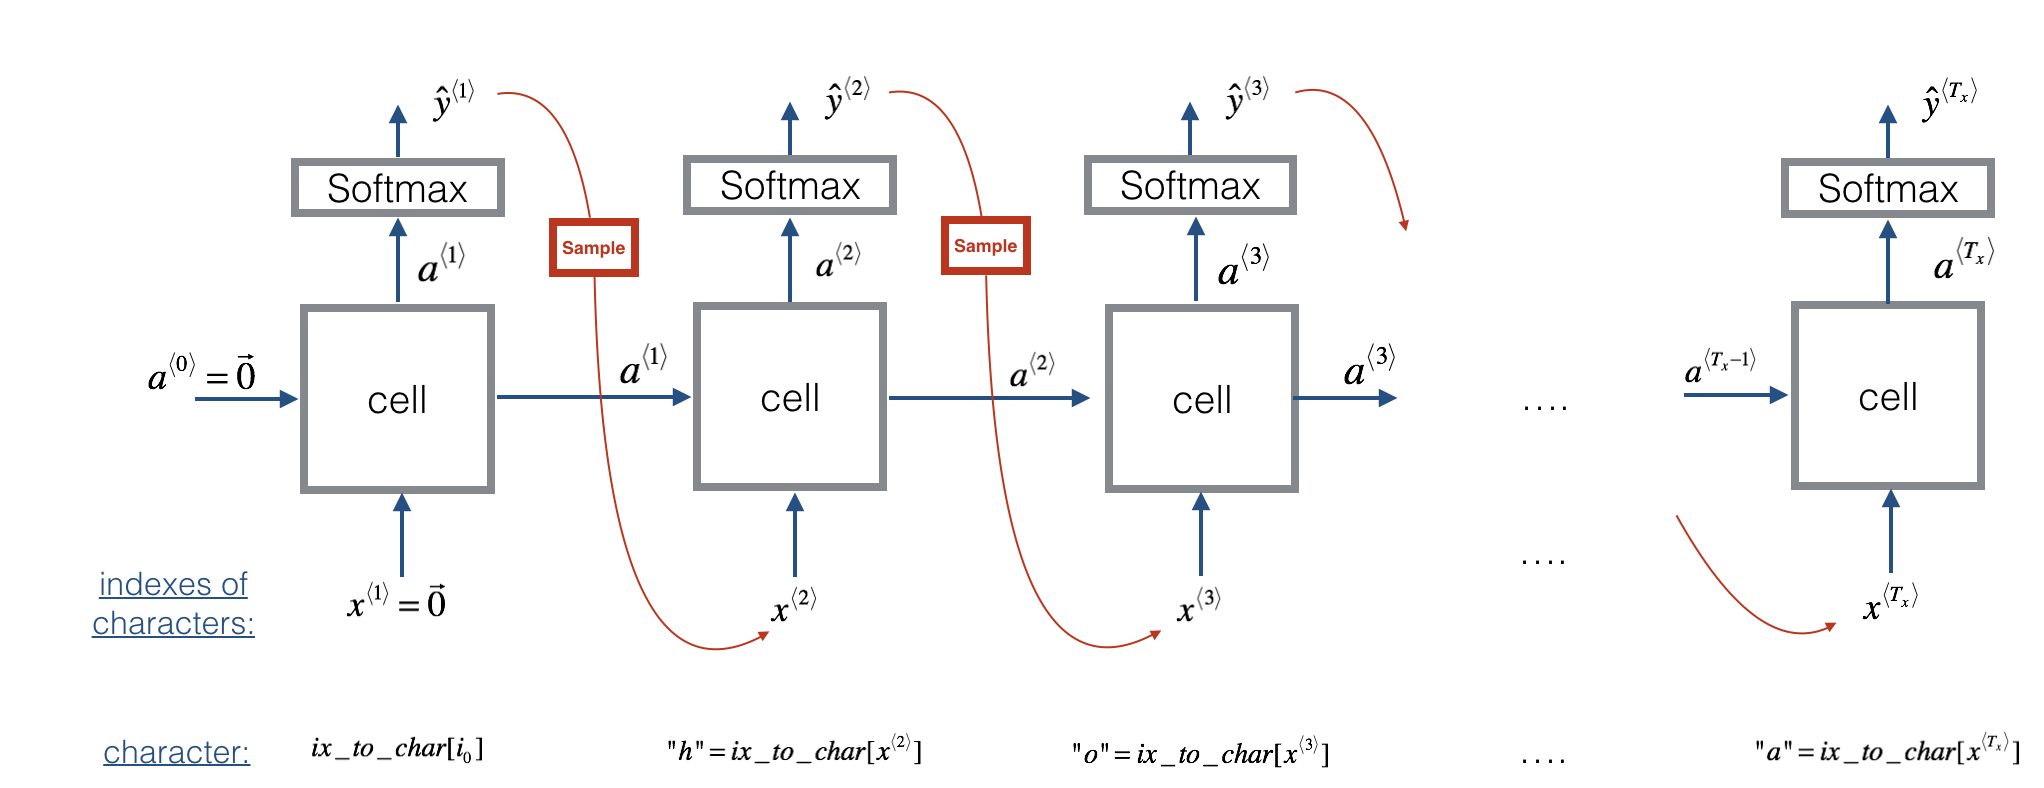

<caption><center> **Figure 3**: In this picture, we assume the model is already trained. We pass in $x^{\langle 1\rangle} = \vec{0}$ at the first time step, and have the network then sample one character at a time. </center></caption>

**Exercise**: Implement the `sample` function below to sample characters. You need to carry out 4 steps:

- **Step 1**: Pass the network the first "dummy" input $x^{\langle 1 \rangle} = \vec{0}$ (the vector of zeros). This is the default input before we've generated any characters. We also set $a^{\langle 0 \rangle} = \vec{0}$

- **Step 2**: Run one step of forward propagation to get $a^{\langle 1 \rangle}$ and $\hat{y}^{\langle 1 \rangle}$. Here are the equations:

$$ a^{\langle t+1 \rangle} = \tanh(W_{ax}  x^{\langle t \rangle } + W_{aa} a^{\langle t \rangle } + b)\tag{1}$$

$$ z^{\langle t + 1 \rangle } = W_{ya}  a^{\langle t + 1 \rangle } + b_y \tag{2}$$

$$ \hat{y}^{\langle t+1 \rangle } = softmax(z^{\langle t + 1 \rangle })\tag{3}$$

Note that $\hat{y}^{\langle t+1 \rangle }$ is a (softmax) probability vector (its entries are between 0 and 1 and sum to 1). $\hat{y}^{\langle t+1 \rangle}_i$ represents the probability that the character indexed by "i" is the next character.  We have provided a `softmax()` function that you can use.

- **Step 3**: Carry out sampling: Pick the next character's index according to the probability distribution specified by $\hat{y}^{\langle t+1 \rangle }$. This means that if $\hat{y}^{\langle t+1 \rangle }_i = 0.16$, you will pick the index "i" with 16% probability. To implement it, you can use [`np.random.choice`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html).

Here is an example of how to use `np.random.choice()`:
```python
np.random.seed(0)
p = np.array([0.1, 0.0, 0.7, 0.2])
index = np.random.choice([0, 1, 2, 3], p = p.ravel())
```
This means that you will pick the `index` according to the distribution: 
$P(index = 0) = 0.1, P(index = 1) = 0.0, P(index = 2) = 0.7, P(index = 3) = 0.2$.

- **Step 4**: The last step to implement in `sample()` is to overwrite the variable `x`, which currently stores $x^{\langle t \rangle }$, with the value of $x^{\langle t + 1 \rangle }$. You will represent $x^{\langle t + 1 \rangle }$ by creating a one-hot vector corresponding to the character you've chosen as your prediction. You will then forward propagate $x^{\langle t + 1 \rangle }$ in Step 1 and keep repeating the process until you get a "\n" character, indicating you've reached the end of the dinosaur name. 

In [ ]:
# GRADED FUNCTION: sample

def sample(parameters, char_to_ix, seed):
    """
    Sample a sequence of characters according to a sequence of probability distributions output of the RNN

    Arguments:
    parameters -- python dictionary containing the parameters Waa, Wax, Wya, by, and b. 
    char_to_ix -- python dictionary mapping each character to an index.
    seed -- used for grading purposes. Do not worry about it.

    Returns:
    indices -- a list of length n containing the indices of the sampled characters.
    """
    
    # Retrieve parameters and relevant shapes from "parameters" dictionary
    Waa, Wax, Wya, by, b = parameters['Waa'], parameters['Wax'], parameters['Wya'], parameters['by'], parameters['b']
    vocab_size = by.shape[0]
    n_a = Waa.shape[1]
    
    ### START CODE HERE ###
    # Step 1: Create the one-hot vector x for the first character (initializing the sequence generation). (≈1 line)
    #x = None
    x = np.zeros((vocab_size, 1))
    # Step 1': Initialize a_prev as zeros (≈1 line)
    #a_prev = None
    a_prev = np.zeros((n_a, 1))
    
    # Create an empty list of indices, this is the list which will contain the list of indices of the characters to generate (≈1 line)
    indices = []
    
    # Idx is a flag to detect a newline character, we initialize it to -1
    idx = -1 
    
    # Loop over time-steps t. At each time-step, sample a character from a probability distribution and append 
    # its index to "indices". We'll stop if we reach 50 characters (which should be very unlikely with a well 
    # trained model), which helps debugging and prevents entering an infinite loop. 
    counter = 0
    newline_character = char_to_ix['\n']
    
    while (idx != newline_character and counter != 50):
        
        # Step 2: Forward propagate x using the equations (1), (2) and (3)
        #a = None
        #z = None
        #y = None
        a = np.tanh(np.dot(Wax, x) + np.dot(Waa, a_prev) + b)
        z = np.dot(Wya, a) + by
        y = softmax(z)
        
        # for grading purposes
        np.random.seed(counter+seed) 
        
        # Step 3: Sample the index of a character within the vocabulary from the probability distribution y
        #idx = None
        idx = np.random.choice(list(range(vocab_size)), p = y.ravel())

        # Append the index to "indices"
        indices.append(idx)
        
        # Step 4: Overwrite the input character as the one corresponding to the sampled index.
        #x = None
        #x[None] = None
        x = np.zeros((vocab_size, 1))
        x[idx] = 1        
        
        # Update "a_prev" to be "a"
        #a_prev = None
        a_prev = a
            
        # for grading purposes
        seed += 1
        counter +=1
        
    ### END CODE HERE ###

    if (counter == 50):
        indices.append(char_to_ix['\n'])
    
    return indices

In [ ]:
np.random.seed(2)
n, n_a = 20, 100
a0 = np.random.randn(n_a, 1)
i0 = 1 # first character is ix_to_char[i0]
Wax, Waa, Wya = np.random.randn(n_a, vocab_size), np.random.randn(n_a, n_a), np.random.randn(vocab_size, n_a)
b, by = np.random.randn(n_a, 1), np.random.randn(vocab_size, 1)
parameters = {"Wax": Wax, "Waa": Waa, "Wya": Wya, "b": b, "by": by}


indices = sample(parameters, char_to_ix, 0)
print("Sampling:")
print("list of sampled indices:", indices)
print("list of sampled characters:", [ix_to_char[i] for i in indices])

** Expected output:**
<table>
<tr>
    <td> 
    **list of sampled indices:**
    </td>
    <td> 
    [18, 2, 26, 0]
    </td>
    </tr><tr>
    <td> 
    **list of sampled characters:**
    </td>
    <td> 
    ['r', 'b', 'z', '\n']
    </td>
    
        
    
</tr>
</table>

## 3 - Building the language model 

It is time to build the character-level language model for text generation. 


### 3.1 - Gradient descent 

In this section you will implement a function performing one step of stochastic gradient descent (with clipped gradients). You will go through the training examples one at a time, so the optimization algorithm will be stochastic gradient descent. As a reminder, here are the steps of a common optimization loop for an RNN:

- Forward propagate through the RNN to compute the loss
- Backward propagate through time to compute the gradients of the loss with respect to the parameters
- Clip the gradients if necessary 
- Update your parameters using gradient descent 

**Exercise**: Implement this optimization process (one step of stochastic gradient descent). 

We provide you with the following functions: 

```python
def rnn_forward(X, Y, a_prev, parameters):
    """ Performs the forward propagation through the RNN and computes the cross-entropy loss.
    It returns the loss' value as well as a "cache" storing values to be used in the backpropagation."""
    ....
    return loss, cache
    
def rnn_backward(X, Y, parameters, cache):
    """ Performs the backward propagation through time to compute the gradients of the loss with respect
    to the parameters. It returns also all the hidden states."""
    ...
    return gradients, a

def update_parameters(parameters, gradients, learning_rate):
    """ Updates parameters using the Gradient Descent Update Rule."""
    ...
    return parameters
```

In [ ]:
# GRADED FUNCTION: optimize

def optimize(X, Y, a_prev, parameters, learning_rate = 0.01):
    """
    Execute one step of the optimization to train the model.
    
    Arguments:
    X -- list of integers, where each integer is a number that maps to a character in the vocabulary.
    Y -- list of integers, exactly the same as X but shifted one index to the left.
    a_prev -- previous hidden state.
    parameters -- python dictionary containing:
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        b --  Bias, numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
    learning_rate -- learning rate for the model.
    
    Returns:
    loss -- value of the loss function (cross-entropy)
    gradients -- python dictionary containing:
                        dWax -- Gradients of input-to-hidden weights, of shape (n_a, n_x)
                        dWaa -- Gradients of hidden-to-hidden weights, of shape (n_a, n_a)
                        dWya -- Gradients of hidden-to-output weights, of shape (n_y, n_a)
                        db -- Gradients of bias vector, of shape (n_a, 1)
                        dby -- Gradients of output bias vector, of shape (n_y, 1)
    a[len(X)-1] -- the last hidden state, of shape (n_a, 1)
    """
    
    ### START CODE HERE ###
    
    # Forward propagate through time (≈1 line)
    #loss, cache = None
    loss, cache = rnn_forward(X, Y, a_prev, parameters)
    
    # Backpropagate through time (≈1 line)
    #gradients, a = None
    gradients, a = rnn_backward(X, Y, parameters, cache)
    
    # Clip your gradients between -5 (min) and 5 (max) (≈1 line)
    #gradients = None
    gradients = clip(gradients, maxValue=5)
    
    # Update parameters (≈1 line)
    #parameters = None
    parameters = update_parameters(parameters, gradients, learning_rate)
    
    ### END CODE HERE ###

    
    
    return loss, gradients, a[len(X)-1]

In [15]:
np.random.seed(1)
vocab_size, n_a = 27, 100
a_prev = np.random.randn(n_a, 1)
Wax, Waa, Wya = np.random.randn(n_a, vocab_size), np.random.randn(n_a, n_a), np.random.randn(vocab_size, n_a)
b, by = np.random.randn(n_a, 1), np.random.randn(vocab_size, 1)
parameters = {"Wax": Wax, "Waa": Waa, "Wya": Wya, "b": b, "by": by}
X = [12,3,5,11,22,3]
Y = [4,14,11,22,25, 26]

loss, gradients, a_last = optimize(X, Y, a_prev, parameters, learning_rate = 0.01)
print("Loss =", loss)
print("gradients[\"dWaa\"][1][2] =", gradients["dWaa"][1][2])
print("np.argmax(gradients[\"dWax\"]) =", np.argmax(gradients["dWax"]))
print("gradients[\"dWya\"][1][2] =", gradients["dWya"][1][2])
print("gradients[\"db\"][4] =", gradients["db"][4])
print("gradients[\"dby\"][1] =", gradients["dby"][1])
print("a_last[4] =", a_last[4])

Loss = 126.503975722
gradients["dWaa"][1][2] = 0.194709315347
np.argmax(gradients["dWax"]) = 1146
gradients["dWya"][1][2] = -0.007773876032
gradients["db"][4] = [-0.06809825]
gradients["dby"][1] = [ 0.01538192]
a_last[4] = [-1.]


** Expected output:**

<table>


<tr>
    <td> 
    **Loss **
    </td>
    <td> 
    126.503975722
    </td>
</tr>
<tr>
    <td> 
    **gradients["dWaa"][1][2]**
    </td>
    <td> 
    0.194709315347
    </td>
<tr>
    <td> 
    **np.argmax(gradients["dWax"])**
    </td>
    <td> 93
    </td>
</tr>
<tr>
    <td> 
    **gradients["dWya"][1][2]**
    </td>
    <td> -0.007773876032
    </td>
</tr>
<tr>
    <td> 
    **gradients["db"][4]**
    </td>
    <td> [-0.06809825]
    </td>
</tr>
<tr>
    <td> 
    **gradients["dby"][1]**
    </td>
    <td>[ 0.01538192]
    </td>
</tr>
<tr>
    <td> 
    **a_last[4]**
    </td>
    <td> [-1.]
    </td>
</tr>

</table>

### 3.2 - Training the model 

Given the dataset of dinosaur names, we use each line of the dataset (one name) as one training example. Every 100 steps of stochastic gradient descent, you will sample 10 randomly chosen names to see how the algorithm is doing. Remember to shuffle the dataset, so that stochastic gradient descent visits the examples in random order. 

**Exercise**: Follow the instructions and implement `model()`. When `examples[index]` contains one dinosaur name (string), to create an example (X, Y), you can use this:
```python
        index = j % len(examples)
        X = [None] + [char_to_ix[ch] for ch in examples[index]] 
        Y = X[1:] + [char_to_ix["\n"]]
```
Note that we use: `index= j % len(examples)`, where `j = 1....num_iterations`, to make sure that `examples[index]` is always a valid statement (`index` is smaller than `len(examples)`).
The first entry of `X` being `None` will be interpreted by `rnn_forward()` as setting $x^{\langle 0 \rangle} = \vec{0}$. Further, this ensures that `Y` is equal to `X` but shifted one step to the left, and with an additional "\n" appended to signify the end of the dinosaur name. 

In [ ]:
# GRADED FUNCTION: model

def model(data, ix_to_char, char_to_ix, num_iterations = 35000, n_a = 50, dino_names = 7, vocab_size = 27):
    """
    Trains the model and generates dinosaur names. 
    
    Arguments:
    data -- text corpus
    ix_to_char -- dictionary that maps the index to a character
    char_to_ix -- dictionary that maps a character to an index
    num_iterations -- number of iterations to train the model for
    n_a -- number of units of the RNN cell
    dino_names -- number of dinosaur names you want to sample at each iteration. 
    vocab_size -- number of unique characters found in the text, size of the vocabulary
    
    Returns:
    parameters -- learned parameters
    """
    
    # Retrieve n_x and n_y from vocab_size
    n_x, n_y = vocab_size, vocab_size
    
    # Initialize parameters
    parameters = initialize_parameters(n_a, n_x, n_y)
    
    # Initialize loss (this is required because we want to smooth our loss, don't worry about it)
    loss = get_initial_loss(vocab_size, dino_names)
    
    # Build list of all dinosaur names (training examples).
    with open("dinos.txt") as f:
        examples = f.readlines()
    examples = [x.lower().strip() for x in examples]
    
    # Shuffle list of all dinosaur names
    shuffle(examples)
    
    # Initialize the hidden state of your LSTM
    a_prev = np.zeros((n_a, 1))
    
    # Optimization loop
    for j in range(num_iterations):
        
        ### START CODE HERE ###
        
        # Use the hint above to define one training example (X,Y) (≈ 2 lines)
        #index = None
        #X = None
        #Y = None
        index = j % len(examples)
        X = [None] + [char_to_ix[ch] for ch in examples[index]] 
        Y = X[1:] + [char_to_ix["\n"]]
        
        # Perform one optimization step: Forward-prop -> Backward-prop -> Clip -> Update parameters
        # Choose a learning rate of 0.01
        #curr_loss, gradients, a_prev = None
        
        # Use the hint above to define one training example (X,Y) (≈ 2 lines)

        
        # Perform one optimization step: Forward-prop -> Backward-prop -> Clip -> Update parameters
        # Choose a learning rate of 0.01
        curr_loss, gradients, a_prev = optimize(X, Y, a_prev, parameters, learning_rate = 0.01)
        ### END CODE HERE ###
        
        # Use a latency trick to keep the loss smooth. It happens here to accelerate the training.
        loss = smooth(loss, curr_loss)

        # Every 2000 Iteration, generate "n" characters thanks to sample() to check if the model is learning properly
        if j % 2000 == 0:
            
            print('Iteration: %d, Loss: %f' % (j, loss) + '\n')
            
            # The number of dinosaur names to print
            seed = 0
            for name in range(dino_names):
                
                # Sample indices and print them
                sampled_indices = sample(parameters, char_to_ix, seed)
                print_sample(sampled_indices, ix_to_char)
                
                seed += 1  # To get the same result for grading purposed, increment the seed by one. 
      
            print('\n')
        
    return parameters

Run the following cell, you should observe your model outputting random-looking characters at the first iteration. After a few thousand iterations, your model should learn to generate reasonable-looking names. 

In [ ]:
parameters = model(data, ix_to_char, char_to_ix)

## Conclusion

You can see that your algorithm has started to generate plausible dinosaur names towards the end of the training. At first, it was generating random characters, but towards the end you could see dinosaur names with cool endings. Feel free to run the algorithm even longer and play with hyperparameters to see if you can get even better results. Our implemetation generated some really cool names like `maconucon`, `marloralus` and `macingsersaurus`. Your model hopefully also learned that dinosaur names tend to end in `saurus`, `don`, `aura`, `tor`, etc.

If your model generates some non-cool names, don't blame the model entirely--not all actual dinosaur names sound cool. (For example, `dromaeosauroides` is an actual dinosaur name and is in the training set.) But this model should give you a set of candidates from which you can pick the coolest! 

This assignment had used a relatively small dataset, so that you could train an RNN quickly on a CPU. Training a model of the english language requires a much bigger dataset, and usually needs much more computation, and could run for many hours on GPUs. We ran our dinosaur name for quite some time, and so far our favoriate name is the great, undefeatable, and fierce: Mangosaurus!

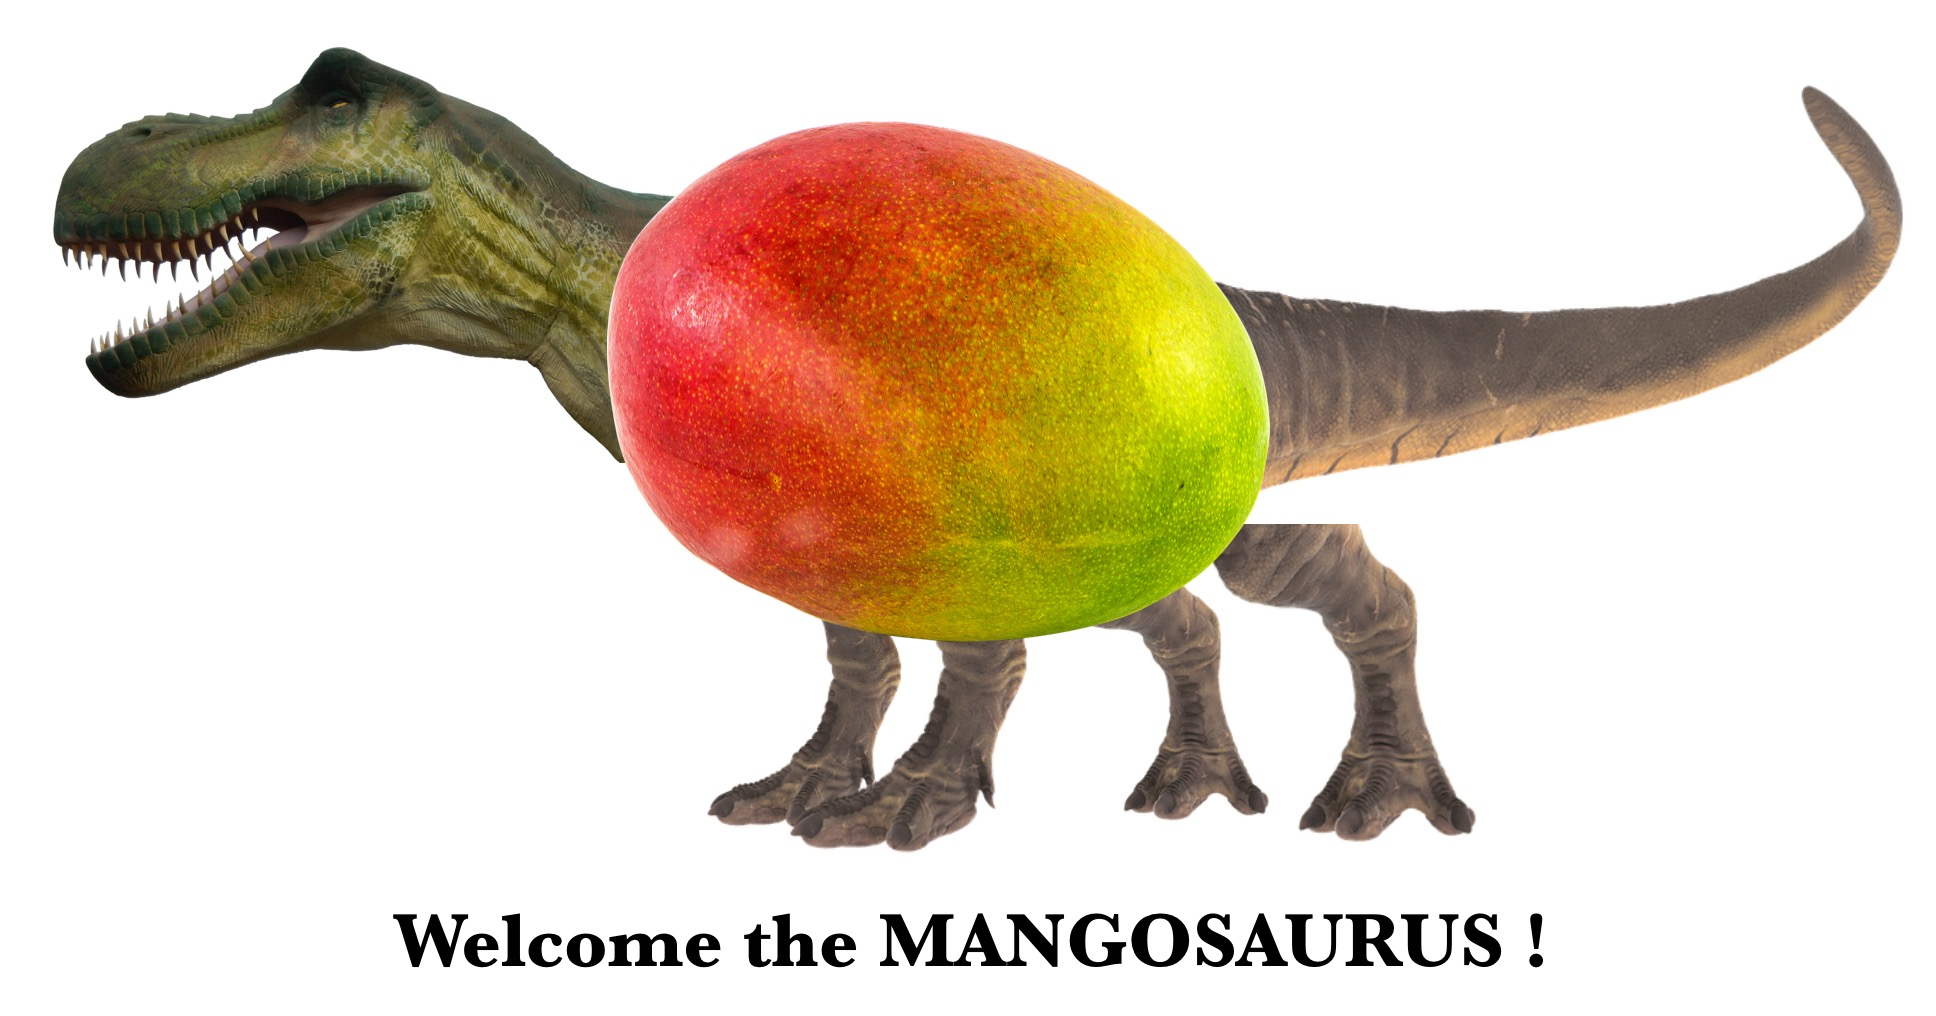

**References**:
- This exercise took inspiration from Andrej Karpathy's implementation: https://gist.github.com/karpathy/d4dee566867f8291f086. To learn more about text generation, also check out Karpathy's [blog post](http://karpathy.github.io/2015/05/21/rnn-effectiveness/).
- For the Shakespearian poem generator, our implementation was based on the implementation of an LSTM text generator by the Keras team: https://github.com/keras-team/keras/blob/master/examples/lstm_text_generation.py 